<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/Investing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install investpy # tarea TradingView-TA , # yfinance 

In [ ]:
 pip install yfinance

In [ ]:
import investpy as inv
import pandas as pd # Dataframe
import matplotlib.pyplot as plt # Estadistica descriptiva y graficos 
import seaborn as sns # Diagrama de correlaccciones 
from openpyxl import workbook   # leer excel 
from openpyxl import load_workbook # leer excel 
import statsmodels.formula.api as smf # Regresion multiple
import yfinance as yf # yahoo finance
import pandas_datareader.data as wb

In [ ]:
from google.colab import files # Descargar archivos Excel 

# **Extraccion de datos**

In [ ]:
# Calendario
lista_paises =  ["united states","Brazil","germany",'euro zone',"colombia","china"]
Importancia = ["high","medium"]
Calendario = inv.economic_calendar("GMT +5:30",countries= lista_paises, importances= Importancia)
Calendario.head()

,id,date,time,zone,currency,importance,event,actual,forecast,previous
0,750,01/02/2022,All Day,china,None,None,China - Spring Festival,None,None,None
1,750,01/02/2022,All Day,china,None,None,China - Spring Festival,None,None,None
2,443963,01/02/2022,12:30,germany,EUR,medium,German Retail Sales (MoM) (Dec),-5.5%,-1.4%,0.8%
3,443979,01/02/2022,14:25,germany,EUR,high,German Manufacturing PMI (Jan),59.8,60.5,57.4
4,443980,01/02/2022,14:25,germany,EUR,high,German Unemployment Change (Jan),-48K,-6K,-29K


**Futuros de indices renta variable**

**Dow Jones**

In [ ]:
inv.get_indices_list("united states")

['NQ US Mid Cap Value',
 'NQ US Mid Cap Growth',
 'NQ US Mid Cap Telecommunications Equipment',
 'NQ US Mid Cap Semiconductors',
 'NQ US Mid Cap Computer Hardware',
 'NQ US Mid Cap Technology Hardware & Equipment',
 'NQ US Mid Cap Technology',
 'NQ US Mid Cap Software',
 'NQ US Mid Cap Software & Computer Services',
 'NQ US Mid Cap Investment Services',
 'NQ US Mid Cap Asset Managers',
 'NQ US Small Cap Oil & Gas',
 'NQ US Mid Cap Financial Service',
 'NQ US Mid Cap Financial Services Sector',
 'NQ US Mid Cap Mortgage REITs',
 'NQ US Small Cap Oil & Gas Producers',
 'NQ US Small Cap Forestry & Paper',
 'NQ US Small Cap Oil Equipment & Services',
 'NQ US Small Cap General Mining',
 'NQ US Small Cap Coal',
 'NQ US Mid Cap Specialty REITs',
 'NQ US Small Cap Mining',
 'NQ US Small Cap Iron & Steel',
 'NQ US Small Cap Nonferrous Metals',
 'NQ US Small Cap Industrial Metals & Mining',
 'NQ US Small Cap Paper',
 'NQ US Small Cap Basic Resources',
 'NQ US Small Cap Specialty Chemicals',
 'NQ 

In [ ]:
dow_jones=inv.search_quotes(text='dow jones', products=['indices'],countries=['united states'], n_results=1)
print(dow_jones)

{"id_": 169, "name": "Dow Jones Industrial Average", "symbol": "DJI", "country": "united states", "tag": "/indices/us-30", "pair_type": "indices", "exchange": "NYSE"}


In [ ]:
Dow_Jones= inv.get_index_recent_data("Dow 30",country="united states")
Dow_Jones_Industrial= Dow_Jones[["Close","Open"]].tail()
print(Dow_Jones_Industrial)

               Close      Open
Date                          
2022-01-25  34296.74  34186.64
2022-01-26  34166.84  34520.82
2022-01-27  34160.51  34261.75
2022-01-28  34726.20  34135.24
2022-01-31  35131.46  34612.80


In [ ]:
Apertura_indice_Dow_Jones_Industrial = (Dow_Jones_Industrial.iat[4,1])#Este comando esta extraer un valor especifico de un dataframe
print(Apertura_indice_Dow_Jones_Industrial)

34612.8


In [ ]:
Cierre_precio_anterior_Dow_Jones_Industrial = Dow_Jones_Industrial.iat[3,0]
print(Cierre_precio_anterior_Dow_Jones_Industrial)

34726.2


In [ ]:
Cierre_precio_anterior5dias_Dow_Jones_Industrial= Dow_Jones_Industrial.iat[0,0]
print(Cierre_precio_anterior5dias_Dow_Jones_Industrial)

34296.74


**S&p500** 

In [ ]:
Standarpoor500=inv.search_quotes("S&P 500 ", products=['indices'],countries=['united states'], n_results=1)
print(Standarpoor500)

{"id_": 166, "name": "S&P 500", "symbol": "US500", "country": "united states", "tag": "/indices/us-spx-500", "pair_type": "indices", "exchange": "NYSE"}


In [ ]:
SP_500= inv.get_index_recent_data("S&P 500",country="united states")
SP_500_1 = SP_500[["Close","Open"]].tail()
print(SP_500_1)

              Close     Open
Date                        
2022-01-25  4356.45  4366.64
2022-01-26  4349.93  4408.43
2022-01-27  4326.50  4380.58
2022-01-28  4431.85  4336.19
2022-01-31  4515.55  4431.79


In [ ]:
Apertura_indice_SP_500 = (SP_500_1.iat[4,1])#Este comando esta extraer un valor especifico de un dataframe
print(Apertura_indice_SP_500)

4431.79


In [ ]:
Cierre_precio_anterior_SP_500= SP_500_1.iat[3,0]
print(Cierre_precio_anterior_SP_500)

4431.85


In [ ]:
Cierre_precio_anterior5dias_SP_500= SP_500_1.iat[0,0]
print(Cierre_precio_anterior5dias_SP_500)

4356.45


**Euro Stoxx 50**

In [ ]:
Euro_stoxx_50=inv.search_quotes(text='Euro Stoxx 50', products=['indices'],countries=['euro zone'], n_results=1)
print(Euro_stoxx_50)

{"id_": 175, "name": "Euro Stoxx 50", "symbol": "STOXX50", "country": "euro zone", "tag": "/indices/eu-stoxx50", "pair_type": "indices", "exchange": "Xetra"}


In [ ]:
inv.get_indices_list("euro zone")

['FTSE MTS Highest Rated Macro-Weighted Government B',
 'FTSE MTS Eurozone Government Broad IG 10-15Y',
 'FTSE MTS Eurozone Government Broad IG 5-7Y',
 'FTSE MTS Eurozone Government Broad IG 3-5Y',
 'FTSE MTS Eurozone Government Bond IG Ex-CNO',
 'FTSE MTS Eur Gov Bond IG 15Y+ Ex-CNO',
 'FTSE MTS Eur Gov Bond IG 10-15Y Ex-CNO',
 'FTSE MTS Eur Gov Bond IG 7-10Y Ex-CNO',
 'TR Eurozone 2 Years Government Benchmark',
 'TR Eurozone 3 Years Government Benchmark',
 'TR Eurozone 5 Years Government Benchmark',
 'TR Eurozone 7 Years Government Benchmark',
 'TR Eurozone 10 Years Government Benchmark',
 'TR Eurozone 15 Years Government Benchmark',
 'FTSE MTS Eur Gov Bond IG 3-5Y Ex-CNO',
 'FTSE MTS Eurozone Government Broad IG',
 'FTSE MTS Eur Gov Bond IG 5-7Y Ex-CNO',
 'FTSE MTS Eur Gov Bond IG 1-3Y Ex-CNO',
 'FTSE MTS Highest-Rated Eurozone Government Bond',
 'TR Eurozone 20 Years Government Benchmark',
 'TR Eurozone 30 Years Government Benchmark',
 'Amundi Float Rate Eur Corp 1-3',
 'iBoxx EUR 

In [ ]:
Euro_Stoxx_50=inv.get_index_recent_data("Euro Stoxx 50",country="germany")
Stoxx_50=Euro_Stoxx_50[["Close","Open"]].tail()
print(Stoxx_50)

              Close     Open
Date                        
2022-01-26  4164.60  4096.51
2022-01-27  4184.97  4144.78
2022-01-28  4136.91  4174.57
2022-01-31  4174.60  4161.77
2022-02-01  4215.45  4206.15


In [ ]:
Apertura_indice_Euro_Stoxx_50 = (Stoxx_50.iat[4,1])#Este comando esta extraer un valor especifico de un dataframe
print(Apertura_indice_Euro_Stoxx_50)

4206.15


In [ ]:
Cierre_precio_anterior_Euro_Stoxx_50 = Stoxx_50.iat[3,0]
print(Cierre_precio_anterior_Euro_Stoxx_50 )

4174.6


In [ ]:
Cierre_precio_anterior5dias_Euro_Stoxx_50= Stoxx_50.iat[0,0]
print(Cierre_precio_anterior5dias_Euro_Stoxx_50)

4164.6


**Dax (Alemania)**

In [ ]:
Dax_Alemania=inv.search_quotes(text='DAX Futures', products=['indices'],countries=['germany'], n_results=1)
print(Dax_Alemania)

{"id_": 8826, "name": "DAX Futures", "symbol": "DE30", "country": "germany", "tag": "/indices/germany-30-futures", "pair_type": "indices", "exchange": "Eurex"}


In [ ]:
inv.get_indices_list("germany")

['Technology All Share',
 'Pharma & Healthcare',
 'Software',
 'Technology',
 'Telecom',
 'Transport & Logistics',
 'DJ Germany Titans 30 TR US',
 'Midcap',
 'Retail',
 'Classic All Share',
 'XETRA DAX Price',
 'Prime All Share',
 'REX 10 Years',
 'REX 10 Year Performance',
 'REX 1 Year Performance',
 'REX 1 Year',
 'REX',
 'PRIME IG MINING',
 'Prime All Share Price',
 'North American Marijuana',
 'NISAX 20',
 'MVIS Vietnam TR Net',
 'MVIS US Listed Retail 25 Pr',
 'MVIS US Business Development Companies Pr',
 'MVIS Russia TR Net',
 'MVIS Russia Small Cap',
 'MVIS Russia',
 'MVIS Poland TR Net',
 'MVIS India Small-Cap TR Net',
 'MVIS Global Rare Earth/Strategic Metals TR Net',
 'MVIS Global Junior Gold Miners TR Net',
 'MVIS Egypt TR Net',
 'MVIS Brazil Small-Cap TR Net',
 'REX 2 Year Performance',
 'Long DAX x3 AR TR',
 'REX 2 Years',
 'REX 3 Years',
 'TecDAX Price',
 'STOXX Europe 50 EUR Price',
 'STOXX 50 EUR Net Return',
 'Solactive Leveraged Short x 7 BTP Futures',
 'Solacative Co

In [ ]:
Dax_Alemania=inv.get_index_recent_data("DAX",country="germany")
Dax=Dax_Alemania[["Close","Open"]].tail()
print(Dax)

               Close      Open
Date                          
2022-01-26  15459.39  15273.06
2022-01-27  15524.27  15229.98
2022-01-28  15318.95  15411.86
2022-01-31  15471.20  15506.79
2022-02-01  15639.39  15571.04


In [ ]:
Apertura_indice_Dax_Alemania = (Dax.iat[4,1])#Este comando esta extraer un valor especifico de un dataframe
print(Apertura_indice_Dax_Alemania )

15571.04


In [ ]:
Cierre_precio_anterior_Dax_Alemania = Dax.iat[3,0]
print(Cierre_precio_anterior_Dax_Alemania)

15471.2


In [ ]:
Cierre_precio_anterior5dias_Dax_Alemania= Dax.iat[0,0]
print(Cierre_precio_anterior5dias_Dax_Alemania)

15459.39


**Nikkei (Japón)**

In [ ]:
Nikkei_japon=inv.search_quotes(text='Nikkei 225 Futures', products=['indices'],countries=['japan'], n_results=1)
print(Nikkei_japon)

{"id_": 8859, "name": "Nikkei 225 Futures", "symbol": "JP225", "country": "japan", "tag": "/indices/japan-225-futures", "pair_type": "indices", "exchange": "OSE"}


In [ ]:
inv.get_indices_list("japan")

['TSE TOPIX17 Wholesale Stock Price',
 'TOPIX Banks',
 'TSE TOPIX17 Transportation Stock Price',
 'TOPIX Air Transportation',
 'TSE TOPIX17 Steel Stock Price',
 'TSE TOPIX17 IT Services Stock Price',
 'TSE TOPIX17 Real Estate Stock Price',
 'TSE TOPIX17 Power Gas Stock Price',
 'TSE TOPIX17 Pharmacetical Stock Price',
 'TSE TOPIX17 Machinery Stock Price',
 'TSE TOPIX17 Food Stock Price',
 'TOPIX Chemicals',
 'TSE TOPIX17 Retail Stock Price',
 'TOPIX Construction',
 'TOPIX Insurance',
 'TOPIX Electric Power & Gas',
 'Stoxx Japan 50  Daily EUR',
 'Stoxx Japan 50 Risk 10% RV USD',
 'Stoxx Japan 50 Risk 10% RV EUR',
 'Stoxx Japan 50 Risk 15% RV EUR',
 'Stoxx Japan 50 Risk 20% RV USD',
 'Stoxx Japan 50 Risk 20% RV EUR',
 'Stoxx Japan 50 Risk 5% RV USD',
 'Stoxx Japan 50 Risk 5% RV EUR',
 'TOPIX Other Products',
 'TOPIX Other Financing Business',
 'TOPIX Electric Appliances',
 'TOPIX Oil & Coal Products',
 'TOPIX Mining',
 'TOPIX Metal Products',
 'TOPIX Marine Transportation',
 'TOPIX Machi

In [ ]:
Nikkei_225=inv.get_index_recent_data("Nikkei 225",country="japan")
Nikkei=Nikkei_225[["Close","Open"]].tail()
print(Nikkei)

               Close      Open
Date                          
2022-01-26  27011.33  27105.98
2022-01-27  26170.30  27139.88
2022-01-28  26717.34  26429.85
2022-01-31  27001.98  26690.60
2022-02-01  27078.48  27167.14


In [ ]:
Apertura_indice_Dax_Nikkei_225 = (Nikkei.iat[4,1])#Este comando esta extraer un valor especifico de un dataframe
print(Apertura_indice_Dax_Nikkei_225  )

27167.14


In [ ]:
Cierre_precio_anterior_Dax_Nikkei_225 = Nikkei.iat[3,0]
print(Cierre_precio_anterior_Dax_Nikkei_225)

27001.98


In [ ]:
Cierre_precio_anterior5dias_Dax_Nikkei_225= Nikkei.iat[0,0]
print(Cierre_precio_anterior5dias_Dax_Nikkei_225)

27011.33


**Hang Seng (China)**

In [ ]:
Hang_seng_china= inv.search_quotes(text='Hang Seng', products=['indices'],countries=['Hong Kong'], n_results=1)
print(Hang_seng_china)

{"id_": 8984, "name": "Hang Seng Futures", "symbol": "HK50", "country": "hong kong", "tag": "/indices/hong-kong-40-futures", "pair_type": "indices", "exchange": "HKEx"}


In [ ]:
inv.get_indices_list("china")

['MSCI China Price HKD',
 'MSCI China A NR USD',
 'AlphaShares China All Cap',
 'AlphaShares China Technology',
 'S Box China Energy TR',
 'S Box China Industrial TR',
 'S Box China Consumer TR',
 'CSI Overseas China Internet USD',
 'HSCEIF 3XL',
 'HSIF 4XS',
 'HSCEIF 4XL',
 'HSIF 1XL',
 'HSIF 2XL',
 'HSIF 1XS',
 'HSIF 2XS',
 'HSIF 3XS',
 'CSI Overseas China 5y Plan USD',
 'China Securities 300 Consumer Disc',
 'DJ China Offshore 50',
 'CSI 300 Net TR USD',
 'DJ Shenzhen',
 'DJ Shanghai',
 'BNY Mellon China Select ADRSM',
 'HSCEIF 3XS',
 'BNY Mellon China ADR',
 'BNY Mellon China Classic ADR',
 'BNY Mellon China xià yī dài ADR',
 'DJ China Offshore 50 Tot',
 'BNY Mellon China ADR TR',
 'BNY Mellon China Select ADR TRSM',
 'FTSE China A-H 50',
 'FTSE China A All Share',
 'FTSE RAFI Hong Kong/China',
 'MSCI Golden Dragon',
 'MSCI Zhong Hua',
 'DJ BRIC China 15 Capped NTR',
 'BNY Mellon China Classic ADR TR',
 'HSCEIF 1XL',
 'HSCEIF 2XL',
 'HSCEIF 1XS',
 'FTSE China Chemicals EUR',
 'FTSE

In [ ]:
Hang_seng_china=inv.get_index_recent_data("Hang Seng",country="Hong Kong")
Hang_seng=Hang_seng_china[["Close","Open"]].tail()
print(Hang_seng)

               Close      Open
Date                          
2022-01-25  24243.61  24251.52
2022-01-26  24289.90  24342.90
2022-01-27  23807.00  23952.01
2022-01-28  23550.08  23818.94
2022-01-31  23802.26  23624.14


In [ ]:
Apertura_indice_Hang_seng = (Hang_seng.iat[4,1])#Este comando esta extraer un valor especifico de un dataframe
print(Apertura_indice_Hang_seng )

23624.14


In [ ]:
Cierre_precio_anterior_Hang_seng = Hang_seng.iat[3,0]
print(Cierre_precio_anterior_Hang_seng )

23550.08


In [ ]:
Cierre_precio_anterior5dias_Hang_seng= Hang_seng.iat[0,0]
print(Cierre_precio_anterior5dias_Hang_seng)

24243.61


**Indices Renta variable Sudamerica**

**Brasil**

In [ ]:
inv.get_indices_list("brazil")

['MSCI Brazil Net USD',
 'DJ Brazil',
 'TR Brazil 50',
 'MSCI Brazil Price USD',
 'DJ Brazil Titans 20 ADR',
 'BNY Mellon Brazil ADR',
 'BNY Mellon Brazil ADR TR',
 'BNY Mellon Brazil Classic ADR',
 'BNY Mellon Brazil Classic ADR TR',
 'FTSE RAFI Brazil 50',
 'MSCI Brazil 10 40',
 'DJ BRIC Brazil 15 Capped NTR',
 'DJ BRIC Brazil 15 USD',
 'DJ BRIC Brazil 15 EUR',
 'FTSE Brazil Infrastructure Extended',
 'MSCI Brazil Gross',
 'DJ Brazil Titans 20 ADR TR',
 'MSCI Brazil 25-50 Price',
 'MSCI Brazil 20-50 Gross Return',
 'MSCI Brazil 25-50 Net Return',
 'FTSE Brazil Infrastructure Extended USD PR',
 'FTSE Brazil Infrastructure Extended Total Return',
 'FTSE Brazil Infrastructure Extended Net Tax Total',
 'FTSE Brazil Infrastructure Extended Net Tax USD TR',
 'DJ BRIC Brazil 15 DR',
 'MSCI Brazil',
 'BM&FBOVESPA Unsponsored BDRX',
 'Small Cap Index',
 'Tag Along',
 'Brazil broad-Based',
 'Brazil Index',
 'Mid-Large Cap Index',
 'Public Utilities',
 'BM&FBOVESPA Real Estate IFIX',
 'Financia

In [ ]:
data1=inv.get_index_recent_data("Bovespa",country="brazil")
Brazil1=data1[["Close","Open"]].tail()
print(Brazil1)

               Close      Open
Date                          
2022-01-25  110204.0  107935.0
2022-01-26  111289.0  110207.0
2022-01-27  112612.0  111303.0
2022-01-28  111910.0  112611.0
2022-01-31  112144.0  111910.0


In [ ]:
Apertura_indice_Brazil = (Brazil1.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_indice_Brazil)

111910.0


In [ ]:
Cierre_precio_anterior__indice_Brazil = Brazil1.iat[3,0]
print(Cierre_precio_anterior__indice_Brazil)

111910.0


In [ ]:
Cierre_precio_anterior5dias_indice_Brazil= Brazil1.iat[0,0]
print(Cierre_precio_anterior5dias_indice_Brazil)

110204.0


**Mexico**

In [ ]:
inv.get_indices_list("Mexico")

['S&P/BMV IRT LargeCap',
 'S&P/BMV IRT MidCap',
 'S&P/BMV IRT SmallCap',
 'S&P/BMV IMeBz',
 'S&P/BMV IMeBz RT',
 'MSCI Mexico Gross',
 'BURSA OPTIMO RT',
 'BNY Mellon Mexico Classic ADR',
 'BNY Mellon Mexico ADR TR',
 'BNY Mellon Mexico ADR',
 'NQ Mexico Financials',
 'DJ Mexico USD',
 'DJ Mexico',
 'MSCI Mexico',
 'BNY Mellon Mexico Classic ADR TR',
 'S&P/BMV IRT CompMx',
 'MSCI Mexico Special Capping Net USD',
 'S&P/BMV IPC SUSTENTABLE RT',
 'S&P/BMV-EXTR RT',
 'S&P/BMV-COMERCIO RT',
 'Banamex',
 'FTSE BIVA Eod Net Tax',
 'FTSE BIVA EOD Price',
 'FTSE BIVA EOD TR',
 'FTSE BIVA Real Time Net Tax',
 'FTSE BIVA Real Time Total Return',
 'FTSE Mexico',
 'Mexico 50',
 'S&P/BMV BMBra 15',
 'S&P/BMV BMBra 15 RT',
 'S&P/BMV-SRVCM RT',
 'S&P/BMV DDBOL',
 'S&P/BMV IRT',
 'S&P/BMV-MAT RT',
 'S&P/BMV-TRANS RT',
 'S&P/BMV-ENL RT',
 'S&P/BMV-INDU RT',
 'S&P/BMV-MAT',
 'S&P/BMV-INDU',
 'S&P/BMV HABITA',
 'S&P/BMV SALUD',
 'S&P/BMV SERVS FINAN',
 'S&P/BMV PROD CONS FREC',
 'S&P/BMV SRVS CONS NO BCO'

In [ ]:
data2=inv.get_index_recent_data("S&P/BMV IPC",country="Mexico")
Mexico1=data2[["Close","Open"]].tail()
print(Mexico1)

               Close      Open
Date                          
2022-01-25  51104.39  50792.00
2022-01-26  51037.05  51314.27
2022-01-27  50466.02  51208.23
2022-01-28  50661.86  50522.00
2022-01-31  51330.85  50670.28


In [ ]:
Apertura_indice_Mexico = (Mexico1.iat[4,1])#Este comando esta extraer un valor especifico de un dataframe
print(Apertura_indice_Mexico)

50670.28


In [ ]:
Cierre_precio_anterior_indice_Mexico = Mexico1.iat[3,0]
print(Cierre_precio_anterior_indice_Mexico)

50661.86


In [ ]:
Cierre_precio_anterior5dias_indice_Mexico = Mexico1.iat[0,0]
print(Cierre_precio_anterior5dias_indice_Mexico)

51104.39


**Chile**

In [ ]:
inv.get_indices_list("chile")

['BNY Mellon Chile ADR TR',
 'Inter 10',
 'FTSE Chile',
 'S&P CLX IPSA',
 'BNY Mellon Chile ADR',
 'S&P CLX IGPA',
 'DJ Chile',
 'MSCI Chile Net USD',
 'MSCI Chile',
 'DJ Chile USD']

In [ ]:
data3=inv.get_index_recent_data("S&P CLX IPSA ",country="chile")
Chile1=data3[["Close","Open"]].tail()
print(Chile1)

              Close     Open
Date                        
2022-01-25  4529.30  4503.17
2022-01-26  4552.33  4529.30
2022-01-27  4562.74  4552.33
2022-01-28  4542.86  4562.74
2022-01-31  4548.45  4542.86


In [ ]:
Apertura__indice_Chile = (Chile1.iat[4,1])# Este comando esta extraer un valor especifico de un dataframe
print(Apertura__indice_Chile)

4542.86


In [ ]:
Cierre_precio_anterior_indice_Chile= Chile1.iat[3,0]
print(Cierre_precio_anterior_indice_Chile)

4542.86


In [ ]:
Cierre_precio_anterior5dias_indice_Chile = Chile1.iat[0,0]
print(Cierre_precio_anterior5dias_indice_Chile )

4529.3


**Colombia**

In [ ]:
inv.get_indices_list("Colombia")

['FTSE Colombia',
 'COLEQTY',
 'COLSC',
 'COL20',
 'COLIR',
 'COL General',
 'COL Financial',
 'COL Public Services',
 'Investment',
 'COL Industrial',
 'COLCAP',
 'MSCI Colombia',
 'COL Services']

In [ ]:
data4=inv.get_index_recent_data("COLCAP",country="Colombia")
Colombia1=data4[["Close","Open"]].tail()
print(Colombia1)

              Close     Open
Date                        
2022-01-25  1527.48  1521.74
2022-01-26  1522.26  1534.39
2022-01-27  1520.63  1524.18
2022-01-28  1529.85  1522.82
2022-01-31  1536.92  1530.65


In [ ]:
Apertura_indice_Colombia = (Colombia1.iat[4,1])# Este comando esta extraer un valor especifico de un dataframe
print(Apertura_indice_Colombia )

1530.65


In [ ]:
Cierre_precio_anterior_indice_Colombia= Colombia1.iat[3,0]
print(Cierre_precio_anterior_indice_Colombia)

1529.85


In [ ]:
Cierre_precio_anterior5dias_indice_Colombia = Colombia1.iat[0,0]
print(Cierre_precio_anterior5dias_indice_Colombia  ) 

1527.48


**Materia Primas**

**Petroleo brent**

In [ ]:
inv.get_commodities(group="energy")

,title,country,name,full_name,currency,group
0,Real Time Streaming Futures Quotes,united kingdom,Brent Oil,Brent Oil Futures,USD,energy
1,Real Time Streaming Futures Quotes,united states,Crude Oil WTI,Crude Oil WTI Futures,USD,energy
2,Real Time Streaming Futures Quotes,united kingdom,London Gas Oil,London Gas Oil Futures,USD,energy
3,Real Time Streaming Futures Quotes,united states,Natural Gas,Natural Gas Futures,USD,energy
4,Real Time Streaming Futures Quotes,united states,Heating Oil,Heating Oil Futures,USD,energy
5,Real Time Streaming Futures Quotes,united kingdom,Carbon Emissions,Carbon Emissions Futures,EUR,energy
6,Real Time Streaming Futures Quotes,united states,Gasoline RBOB,Gasoline RBOB Futures,USD,energy
7,MCX Futures Market Quotes,india,MCX Brent Oil,Brent Oil Futures,INR,energy
8,MCX Futures Market Quotes,india,MCX Crude Oil WTI,Crude Oil WTI Futures,INR,energy
9,MCX Futures Market Quotes,india,MCX Natural Gas,Natural Gas Futures,INR,energy


In [ ]:
brent=inv.get_commodity_recent_data("Brent Oil",country="united kingdom")
brent10=brent[["Close","Open"]].tail()
print(brent10)

            Close   Open
Date                    
2022-01-26  89.96  87.95
2022-01-27  89.34  89.70
2022-01-28  90.03  89.98
2022-01-31  91.21  90.80
2022-02-01  89.16  89.65


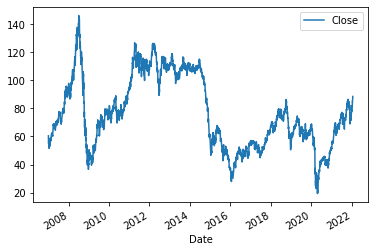

In [ ]:
brent1=inv.get_commodity_historical_data("Brent Oil",country="united kingdom",from_date='01/01/2007',to_date="19/01/2022")
brent2=brent1["Close"]
brent3=pd.DataFrame(brent2)
brent3.plot.line()

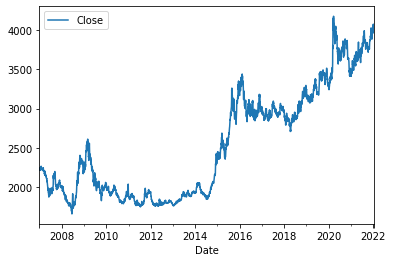

In [ ]:
Dolar1=inv.get_currency_cross_historical_data("USD/COP",from_date='01/01/2007',to_date="19/01/2022")
Dolar2=Dolar1[["Close"]]
Dolar3=pd.DataFrame(Dolar2)
Dolar3.plot.line()

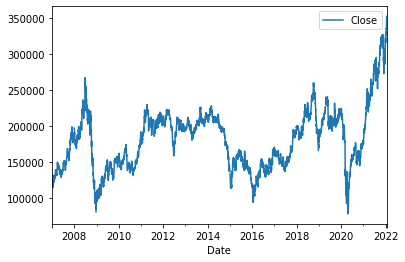

In [ ]:
brent_pesos=Dolar3*brent3
brent_pesos.plot.line()

In [ ]:
Apertura_brent = (brent10.iat[4,1])# Este comando esta extraer un valor especifico de un dataframe
print(Apertura_brent)

89.65


In [ ]:
Cierre_precio_anterior_brent= brent10.iat[3,0]
print(Cierre_precio_anterior_brent)

91.21


In [ ]:
Cierre_precio_anterior5dias_brent = brent10.iat[0,0]
print(Cierre_precio_anterior5dias_brent ) 

89.96


**Petroleo WTI**

In [ ]:
WTI=inv.get_commodity_recent_data("Crude Oil WTI",country="united states")
WTI10=WTI[["Close","Open"]].tail()
print(WTI10)

            Close   Open
Date                    
2022-01-26  87.35  85.26
2022-01-27  86.61  87.15
2022-01-28  86.82  87.50
2022-01-31  88.15  87.45
2022-02-01  88.09  88.39


In [ ]:
Apertura_WTI = (WTI10.iat[4,1])# Este comando esta extraer un valor especifico de un dataframe
print(Apertura_WTI)

88.39


In [ ]:
Cierre_precio_anterior_WTI= WTI10.iat[3,0]
print(Cierre_precio_anterior_WTI)

88.15


In [ ]:
Cierre_precio_anterior5dias_WTI = WTI10.iat[0,0]
print(Cierre_precio_anterior5dias_WTI ) 

87.35


**Oro**

In [ ]:
inv.get_commodities(group="metals")

,title,country,name,full_name,currency,group
0,Real Time Streaming Futures Quotes,,Gold,Gold Futures,USD,metals
1,Real Time Streaming Futures Quotes,united states,Copper,Copper Futures,USD,metals
2,Real Time Streaming Futures Quotes,,Silver,Silver Futures,USD,metals
3,Real Time Streaming Futures Quotes,united states,Palladium,Palladium Futures,USD,metals
4,Real Time Streaming Futures Quotes,united states,Platinum,Platinum Futures,USD,metals
5,Real Time Streaming Futures Quotes,united kingdom,Aluminum,Aluminum Futures,USD,metals
6,Real Time Streaming Futures Quotes,united kingdom,Zinc,Zinc Futures,USD,metals
7,Real Time Streaming Futures Quotes,united kingdom,Lead,Lead Futures,USD,metals
8,Real Time Streaming Futures Quotes,united kingdom,Nickel,Nickel Futures,USD,metals
9,Real Time Streaming Futures Quotes,united kingdom,Tin,Tin Futures,USD,metals


In [ ]:
Oro=inv.get_commodity_recent_data("gold")
Oro1=Oro[["Close","Open"]].tail()
Oro10 = pd.DataFrame(Oro1)
print(Oro10)

             Close     Open
Date                       
2022-01-26  1829.7  1848.00
2022-01-27  1793.1  1819.00
2022-01-28  1784.9  1797.50
2022-01-31  1795.0  1788.50
2022-02-01  1805.7  1797.25


In [ ]:
Apertura_oro = (Oro10.iat[4,1])# Este comando esta extraer un valor especifico de un dataframe
print(Apertura_oro)

1797.25


In [ ]:
Cierre_precio_anterior_oro= Oro10.iat[3,0]
print(Cierre_precio_anterior_oro)

1795.0


In [ ]:
Cierre_precio_anterior5dias_oro = Oro10.iat[0,0]
print(Cierre_precio_anterior5dias_oro )

1829.7


**Cobre**

In [ ]:
Cobre=inv.get_commodity_recent_data("copper",country="united states")
Cobre10=Cobre[["Close","Open"]].tail()
print(Cobre10)

             Close    Open
Date                      
2022-01-27  4.4195  4.4675
2022-01-28  4.3297  4.4195
2022-01-30  4.3305  4.3295
2022-01-31  4.3350  4.3295
2022-02-01  4.3805  4.3345


In [ ]:
Apertura_cobre = (Cobre10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_cobre)

4.3345


In [ ]:
Cierre_precio_anterior_cobre= Cobre10.iat[3,0]
print(Cierre_precio_anterior_cobre)

4.335


In [ ]:
Cierre_precio_anterior5dias_Cobre = Cobre10.iat[0,0]
print(Cierre_precio_anterior5dias_Cobre)

4.4195


**Maiz**

In [ ]:
inv.get_commodities(group="grains")

,title,country,name,full_name,currency,group
0,Real Time Streaming Futures Quotes,united kingdom,London Wheat,London Wheat Futures,GBP,grains
1,Real Time Streaming Futures Quotes,united states,Rough Rice,Rough Rice Futures,USD,grains
2,Real Time Streaming Futures Quotes,united states,US Soybean Oil,US Soybean Oil Futures,USD,grains
3,Real Time Streaming Futures Quotes,united states,US Soybean Meal,US Soybean Meal Futures,USD,grains
4,Real Time Streaming Futures Quotes,united states,US Soybeans,US Soybeans Futures,USD,grains
5,Real Time Streaming Futures Quotes,united states,US Wheat,US Wheat Futures,USD,grains
6,Real Time Streaming Futures Quotes,united states,US Corn,US Corn Futures,USD,grains
7,Real Time Streaming Futures Quotes,united states,Oats,Oats Futures,USD,grains


In [ ]:
Maiz=inv.get_commodity_recent_data("US Corn",country="united states")
Maiz10=Maiz[["Close","Open"]].tail()
print(Maiz10)

             Close    Open
Date                      
2022-01-26  627.00  619.00
2022-01-27  625.25  625.00
2022-01-28  636.00  623.25
2022-01-31  626.00  635.75
2022-02-01  628.10  626.38


In [ ]:
Apertura_Maiz = (Maiz10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Maiz)

626.38


In [ ]:
Cierre_precio_anterior_Maiz= Maiz10.iat[3,0]
print(Cierre_precio_anterior_Maiz)

626.0


In [ ]:
Cierre_precio_anterior5dias_Maiz = Maiz10.iat[0,0]
print(Cierre_precio_anterior5dias_Maiz)

627.0


**Soja**

In [ ]:
soja=inv.get_commodity_recent_data("US Soybeans",country="united states")
soja10=soja[["Close","Open"]].tail()
print(soja10)

              Close     Open
Date                        
2022-01-26  1440.00  1405.75
2022-01-27  1448.25  1436.00
2022-01-28  1470.00  1446.50
2022-01-31  1490.50  1474.00
2022-02-01  1492.25  1489.62


In [ ]:
Apertura_soja = (soja10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_soja)

1489.62


In [ ]:
Cierre_precio_anterior_soja= soja10.iat[3,0]
print(Cierre_precio_anterior_soja)

1490.5


In [ ]:
Cierre_precio_anterior5dias_soja = soja10.iat[0,0]
print(Cierre_precio_anterior5dias_soja)

1440.0


**Cafe**

In [ ]:
inv.get_commodities(group="softs")

,title,country,name,full_name,currency,group
0,Real Time Streaming Futures Quotes,united states,US Coffee C,US Coffee C Futures,USD,softs
1,Real Time Streaming Futures Quotes,united states,US Cotton #2,US Cotton #2 Futures,USD,softs
2,Real Time Streaming Futures Quotes,united states,US Sugar #11,US Sugar #11 Futures,USD,softs
3,Real Time Streaming Futures Quotes,united states,Orange Juice,Orange Juice Futures,USD,softs
4,Real Time Streaming Futures Quotes,united states,US Cocoa,US Cocoa Futures,USD,softs
5,Real Time Streaming Futures Quotes,united kingdom,London Coffee,London Robusta Coffee Futures,USD,softs
6,Real Time Streaming Futures Quotes,united kingdom,London Cocoa,London Cocoa Futures,GBP,softs
7,Real Time Streaming Futures Quotes,united kingdom,London Sugar,London Sugar Futures,USD,softs
8,Real Time Streaming Futures Quotes,united states,Lumber,Lumber Futures,USD,softs
9,MCX Futures Market Quotes,india,MCX Cardamom,Cardamom Futures,INR,softs


In [ ]:
Cafe=inv.get_commodity_recent_data("US Coffee C",country="united states")
Cafe10=Cafe[["Close","Open"]].tail()
print(Cafe10)

             Close    Open
Date                      
2022-01-26  238.90  238.60
2022-01-27  232.05  237.25
2022-01-28  235.90  233.05
2022-01-31  235.10  235.35
2022-02-01  238.85  236.32


In [ ]:
Apertura_Cafe = (Cafe10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Cafe)

236.32


In [ ]:
Cierre_precio_anterior_Cafe= Cafe10.iat[3,0]
print(Cierre_precio_anterior_Cafe)

235.1


In [ ]:
Cierre_precio_anterior5dias_Cafe = Cafe10.iat[0,0]
print(Cierre_precio_anterior5dias_Cafe)

238.9


**Azucar**

In [ ]:
Azucar=inv.get_commodity_recent_data("US Sugar #11	",country="united states")
Azucar10=Azucar[["Close","Open"]].tail()
print(Azucar10)

            Close   Open
Date                    
2022-01-26  18.49  18.75
2022-01-27  18.41  18.39
2022-01-28  18.20  18.42
2022-01-31  18.22  18.30
2022-02-01  18.32  18.31


In [ ]:
Apertura_Azucar = (Azucar10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Azucar)

18.31


In [ ]:
Cierre_precio_anterior_Azucar= Azucar10.iat[3,0]
print(Cierre_precio_anterior_Cafe)

235.1


In [ ]:
Cierre_precio_anterior5dias_Azucar = Azucar10.iat[0,0]
print(Cierre_precio_anterior5dias_Azucar)

18.49


**Bonos a 10Años**

In [ ]:
inv.get_bond_countries()

['argentina',
 'australia',
 'austria',
 'bahrain',
 'bangladesh',
 'belgium',
 'botswana',
 'brazil',
 'bulgaria',
 'canada',
 'chile',
 'china',
 'colombia',
 'croatia',
 'cyprus',
 'czech republic',
 'denmark',
 'egypt',
 'finland',
 'france',
 'germany',
 'greece',
 'hong kong',
 'hungary',
 'iceland',
 'india',
 'indonesia',
 'ireland',
 'israel',
 'italy',
 'japan',
 'jordan',
 'kenya',
 'latvia',
 'lithuania',
 'luxembourg',
 'malaysia',
 'malta',
 'mauritius',
 'mexico',
 'morocco',
 'namibia',
 'netherlands',
 'new zealand',
 'nigeria',
 'norway',
 'pakistan',
 'peru',
 'philippines',
 'poland',
 'portugal',
 'qatar',
 'romania',
 'russia',
 'saudi arabia',
 'serbia',
 'singapore',
 'slovakia',
 'slovenia',
 'south africa',
 'south korea',
 'spain',
 'sri lanka',
 'sweden',
 'switzerland',
 'taiwan',
 'thailand',
 'turkey',
 'uganda',
 'ukraine',
 'united kingdom',
 'united states',
 'venezuela',
 'vietnam']

**Desarrollados**

**EEUU**

In [ ]:
inv.get_bonds_list("united states")

['U.S. 30Y',
 'U.S. 10Y',
 'U.S. 7Y',
 'U.S. 5Y',
 'U.S. 3Y',
 'U.S. 3M',
 'U.S. 1Y',
 'U.S. 6M',
 'U.S. 1M',
 'U.S. 2Y']

In [ ]:
Estados_unidos=inv.get_bond_recent_data(bond="U.S. 10Y")
Estados_unidos10=Estados_unidos[["Close","Open"]].tail()
print(Estados_unidos10)

            Close   Open
Date                    
2022-01-27  1.803  1.851
2022-01-28  1.778  1.808
2022-01-30  1.791  1.787
2022-01-31  1.784  1.789
2022-02-01  1.761  1.789


In [ ]:
Apertura_Estados_unidos = (Estados_unidos10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Estados_unidos)

1.789


In [ ]:
Cierre_precio_anterior_Estados_unidos= Estados_unidos10.iat[3,0]
print(Cierre_precio_anterior_Estados_unidos)

1.784


In [ ]:
Cierre_precio_anterior5dias_Estados_unidos = Estados_unidos10.iat[0,0]
print(Cierre_precio_anterior5dias_Estados_unidos)

1.803


**Alemania**

In [ ]:
inv.get_bonds_list("germany")

['Germany 10Y',
 'Germany 9Y',
 'Germany 15Y',
 'Germany 8Y',
 'Germany 25Y',
 'Germany 30Y',
 'Germany 20Y',
 'Germany 7Y',
 'Germany 1Y',
 'Germany 5Y',
 'Germany 4Y',
 'Germany 3Y',
 'Germany 2Y',
 'Germany 6Y',
 'Germany 9M',
 'Germany 6M',
 'Germany 3M']

In [ ]:
Alemania=inv.get_bond_recent_data(bond="Germany 10Y")
Alemania10=Alemania[["Close","Open"]].tail()
print(Alemania10)

            Close    Open
Date                     
2022-01-26 -0.071 -0.0780
2022-01-27 -0.057 -0.0600
2022-01-28 -0.047 -0.0490
2022-01-31  0.014 -0.0320
2022-02-01 -0.001  0.0115


In [ ]:
Apertura_Alemania = (Alemania10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Alemania)

0.0115


In [ ]:
Cierre_precio_anterior_Alemania= Alemania10.iat[3,0]
print(Cierre_precio_anterior_Alemania)

0.014


In [ ]:
Cierre_precio_anterior5dias_Alemania = Alemania10.iat[0,0]
print(Cierre_precio_anterior5dias_Alemania)

-0.071


**Reino Unido**

In [ ]:
inv.get_bonds_list("United Kingdom")

['U.K. 40Y',
 'U.K. 50Y',
 'U.K. 30Y',
 'U.K. 25Y',
 'U.K. 15Y',
 'U.K. 12Y',
 'U.K. 10Y',
 'U.K. 9Y',
 'U.K. 8Y',
 'U.K. 20Y',
 'U.K. 6Y',
 'U.K. 5Y',
 'U.K. 4Y',
 'U.K. 3Y',
 'U.K. 2Y',
 'U.K. 1Y',
 'U.K. 6M',
 'U.K. 3M',
 'U.K. 1M',
 'U.K. 7Y']

In [ ]:
Reino_unido=inv.get_bond_recent_data(bond="U.K. 10Y")
Reino_unido10=Reino_unido[["Close","Open"]].tail()
print(Reino_unido10)

            Close    Open
Date                     
2022-01-28  1.244  1.2550
2022-01-29  1.243  1.2430
2022-01-30  1.245  1.2450
2022-01-31  1.307  1.2445
2022-02-01  1.280  1.3060


In [ ]:
Apertura_Reino_unido = (Reino_unido10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Reino_unido)

1.306


In [ ]:
Cierre_precio_anterior_Reino_unido= Reino_unido10.iat[3,0]
print(Cierre_precio_anterior_Reino_unido)

1.307


In [ ]:
Cierre_precio_anterior5dias_Reino_unido= Reino_unido10.iat[0,0]
print(Cierre_precio_anterior5dias_Reino_unido)

1.244


**Francia**

In [ ]:
inv.get_bonds_list("france")

['France 8Y',
 'France 30Y',
 'France 25Y',
 'France 20Y',
 'France 50Y',
 'France 15Y',
 'France 10Y',
 'France 9Y',
 'France 7Y',
 'France 9M',
 'France 5Y',
 'France 4Y',
 'France 3Y',
 'France 2Y',
 'France 1Y',
 'France 6M',
 'France 3M',
 'France 1M',
 'France 6Y']

In [ ]:
Francia=inv.get_bond_recent_data(bond="France 10Y")
Francia10=Francia[["Close","Open"]].tail()
print(Francia10)

            Close   Open
Date                    
2022-01-26  0.345  0.327
2022-01-27  0.345  0.374
2022-01-28  0.365  0.360
2022-01-31  0.427  0.373
2022-02-01  0.415  0.423


In [ ]:
Apertura_Francia = (Francia10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Francia)

0.423


In [ ]:
Cierre_precio_anterior_Francia= Francia10.iat[3,0]
print(Cierre_precio_anterior_Francia)

0.427


In [ ]:
Cierre_precio_anterior5dias_Francia= Francia10.iat[0,0]
print(Cierre_precio_anterior5dias_Francia)

0.345


**Italia**

In [ ]:
inv.get_bonds_list("Italy")

['Italy 50Y',
 'Italy 30Y',
 'Italy 20Y',
 'Italy 15Y',
 'Italy 10Y',
 'Italy 9Y',
 'Italy 8Y',
 'Italy 6Y',
 'Italy 7Y',
 'Italy 4Y',
 'Italy 5Y',
 'Italy 3M',
 'Italy 6M',
 'Italy 9M',
 'Italy 1M',
 'Italy 2Y',
 'Italy 3Y',
 'Italy 1Y']

In [ ]:
Italia=inv.get_bond_recent_data(bond="Italy 10Y")
Italia10=Italia[["Close","Open"]].tail()
print(Italia10)

            Close   Open
Date                    
2022-01-26  1.397  1.353
2022-01-27  1.360  1.452
2022-01-28  1.349  1.399
2022-01-31  1.368  1.300
2022-02-01  1.373  1.367


In [ ]:
Apertura_Italia = (Italia10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Italia)

1.367


In [ ]:
Cierre_precio_anterior_Italia= Italia10.iat[3,0]
print(Cierre_precio_anterior_Italia)

1.368


In [ ]:
Cierre_precio_anterior5dias_Italia= Italia10.iat[0,0]
print(Cierre_precio_anterior5dias_Italia)

1.397


**Japon**

In [ ]:
inv.get_bonds_list("japan")

['Japan 7Y',
 'Japan 30Y',
 'Japan 20Y',
 'Japan 15Y',
 'Japan 10Y',
 'Japan 9Y',
 'Japan 8Y',
 'Japan 6Y',
 'Japan 40Y',
 'Japan 4Y',
 'Japan 3Y',
 'Japan 2Y',
 'Japan 1Y',
 'Japan 9M',
 'Japan 6M',
 'Japan 3M',
 'Japan 1M',
 'Japan 5Y']

In [ ]:
Japon=inv.get_bond_recent_data(bond="Japan 10Y")
Japon10=Japon[["Close","Open"]].tail()
print(Japon10)

            Close   Open
Date                    
2022-01-27  0.158  0.146
2022-01-28  0.164  0.152
2022-01-30  0.162  0.163
2022-01-31  0.174  0.165
2022-02-01  0.178  0.176


In [ ]:
Apertura_Japon = (Japon10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Japon)

0.176


In [ ]:
Cierre_precio_anterior_Japon= Japon10.iat[3,0]
print(Cierre_precio_anterior_Japon)

0.174


In [ ]:
Cierre_precio_anterior5dias_Japon= Japon10.iat[0,0]
print(Cierre_precio_anterior5dias_Japon)

0.158


**Latinoamerica**

**Brasil**

In [ ]:
inv.get_bonds_list("Brazil")

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [ ]:
Brazil=inv.get_bond_recent_data(bond="Brazil 10Y")
Brazil10=Brazil[["Close","Open"]].tail()
print(Brazil10)

             Close    Open
Date                      
2022-01-25  11.435  11.435
2022-01-26  11.330  11.330
2022-01-27  11.495  11.495
2022-01-28  11.110  11.495
2022-01-31  11.032  11.421


In [ ]:
Apertura_Brazil = (Brazil10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Brazil)

11.421


In [ ]:
Cierre_precio_anterior_Brazil= Brazil10.iat[3,0]
print(Cierre_precio_anterior_Brazil)

11.11


In [ ]:
Cierre_precio_anterior5dias_Brazil= Brazil10.iat[0,0]
print(Cierre_precio_anterior5dias_Brazil)

11.435


**Mexico**

In [ ]:
inv.get_bonds_list("Mexico")

['Mexico 7Y',
 'Mexico 30Y',
 'Mexico 20Y',
 'Mexico 15Y',
 'Mexico 10Y',
 'Mexico 5Y',
 'Mexico 1Y',
 'Mexico 9M',
 'Mexico 3M',
 'Mexico 1M',
 'Mexico 3Y',
 'Mexico 6M']

In [ ]:
Mexico=inv.get_bond_recent_data(bond="Mexico 10Y")
Mexico10=Mexico[["Close","Open"]].tail()
print(Mexico10)

            Close   Open
Date                    
2022-01-26  7.676  7.617
2022-01-27  7.691  7.726
2022-01-28  7.696  7.689
2022-01-31  7.915  7.943
2022-02-01  7.928  7.928


In [ ]:
Apertura_Mexico = (Mexico10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Mexico)

7.928


In [ ]:
Cierre_precio_anterior_Mexico= Mexico10.iat[3,0]
print(Cierre_precio_anterior_Mexico)

7.915


In [ ]:
Cierre_precio_anterior5dias_Mexico= Mexico10.iat[0,0]
print(Cierre_precio_anterior5dias_Mexico)

7.676


**Chile**

In [ ]:
inv.get_bonds_list("chile")

['Chile 10Y',
 'Chile 8Y',
 'Chile 5Y',
 'Chile 3Y',
 'Chile 2Y',
 'Chile 1Y',
 'Chile 4Y']

In [ ]:
Chile=inv.get_bond_recent_data(bond="Chile 10Y")
Chile10=Chile[["Close","Open"]].tail()
print(Chile10)

            Close  Open
Date                   
2022-01-25   5.84  5.84
2022-01-26   5.87  5.87
2022-01-27   5.94  5.94
2022-01-28   5.92  5.92
2022-01-31   5.82  5.82


In [ ]:
Apertura_Chile = (Chile10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Chile)

5.82


In [ ]:
Cierre_precio_anterior_Chile = Chile10.iat[3,0]
print(Cierre_precio_anterior_Chile)

5.92


In [ ]:
Cierre_precio_anterior5dias_Chile= Chile10.iat[0,0]
print(Cierre_precio_anterior5dias_Chile)

5.84


**Argentina**

In [ ]:
inv.get_bonds_list("argentina")

['Argentina 1Y', 'Argentina 3Y', 'Argentina 5Y', 'Argentina 9Y']

In [ ]:
Argentina=inv.get_bond_recent_data(bond="Argentina 1Y")
Argentina10=Argentina[["Close","Open"]].tail()
print(Argentina10)

            Close   Open
Date                    
2022-01-25  38.17  39.99
2022-01-26  39.22  38.85
2022-01-27  39.86  42.22
2022-01-28  37.10  40.62
2022-01-31  32.82  31.81


In [ ]:
Apertura_Argentina = (Argentina10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Argentina)

31.81


In [ ]:
Cierre_precio_anterior_Argentina = Argentina10.iat[3,0]
print(Cierre_precio_anterior_Argentina)

37.1


In [ ]:
Cierre_precio_anterior5dias_Argentina= Argentina10.iat[0,0]
print(Cierre_precio_anterior5dias_Argentina)

38.17


**Colombia**

In [ ]:
inv.get_bonds_list("colombia")

['Colombia 1Y', 'Colombia 4Y', 'Colombia 5Y', 'Colombia 10Y', 'Colombia 15Y']

In [ ]:
Colombia=inv.get_bond_recent_data(bond="Colombia 10Y")
Colombia10=Colombia[["Close","Open"]].tail()
print(Colombia10)

            Close   Open
Date                    
2022-01-27  8.933  8.939
2022-01-28  8.900  8.957
2022-01-29  8.900  8.900
2022-01-30  8.900  8.900
2022-01-31  8.900  9.001


In [ ]:
Apertura_Colombia = (Colombia10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Colombia)

9.001


In [ ]:
Cierre_precio_anterior_Colombia = Colombia10.iat[3,0]
print(Cierre_precio_anterior_Colombia)

8.9


In [ ]:
Cierre_precio_anterior5dias_Colombia= Colombia10.iat[0,0]
print(Cierre_precio_anterior5dias_Colombia)

8.933


**Peru** 

In [ ]:
inv.get_bonds_list("peru")

['Peru 2Y', 'Peru 5Y', 'Peru 10Y', 'Peru 15Y', 'Peru 20Y', 'Peru 30Y']

In [ ]:
Peru=inv.get_bond_recent_data(bond="Peru 10Y")
Peru10=Peru[["Close","Open"]].tail()
print(Peru10)

            Close   Open
Date                    
2022-01-21  6.053  6.053
2022-01-25  6.087  6.056
2022-01-26  6.090  6.090
2022-01-28  6.110  6.100
2022-01-31  6.126  6.126


In [ ]:
Apertura_Peru = (Peru10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Peru)

6.126


In [ ]:
Cierre_precio_anterior_Peru = Peru10.iat[3,0]
print(Cierre_precio_anterior_Peru)

6.11


In [ ]:
Cierre_precio_anterior5dias_Peru= Peru10.iat[0,0]
print(Cierre_precio_anterior5dias_Peru)

6.053


**Monedas**

**Dolar**

In [ ]:
Dolar=inv.get_currency_cross_recent_data("USD/COP")
Dolar10=Dolar[["Close","Open"]].tail()
print(Dolar10)

              Close     Open
Date                        
2022-01-26  3924.22  3968.15
2022-01-27  3956.63  3930.00
2022-01-28  3951.63  3963.00
2022-01-31  3941.41  3958.00
2022-02-01  3947.78  3947.78


In [ ]:
Apertura_Dolar = (Dolar10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Dolar)

3947.78


In [ ]:
Cierre_precio_anterior_Dolar = Dolar10.iat[3,0]
print(Cierre_precio_anterior_Dolar)

3941.41


In [ ]:
Cierre_precio_anterior5dias_Dolar= Dolar10.iat[0,0]
print(Cierre_precio_anterior5dias_Dolar)

3924.22


**Euro**

In [ ]:
Euro=inv.get_currency_cross_recent_data("EUR/COP")
Euro10=Euro[["Close","Open"]].tail()
print(Euro10)

             Close    Open
Date                      
2022-01-26  4410.0  4484.0
2022-01-27  4409.0  4417.5
2022-01-28  4403.0  4417.0
2022-01-31  4427.0  4411.0
2022-02-01  4448.5  4433.5


In [ ]:
Apertura_Euro = (Euro10.iat[4,1]) # Este comando esta extraer un valor especifico de un dataframe
print(Apertura_Euro)

4433.5


In [ ]:
Cierre_precio_anterior_Euro = Euro10.iat[3,0]
print(Cierre_precio_anterior_Euro)

4427.0


In [ ]:
Cierre_precio_anterior5dias_Euro= Euro10.iat[0,0]
print(Cierre_precio_anterior5dias_Euro)

4410.0


# **Descargar Datos**



In [ ]:
##Historica_data5= pd.concat([Historica_data1,Historica_data2,Historica_data3,Historica_data],axis=1)
## print(Historica_data5)

In [ ]:
## data1=pd.concat([Bovespa1,Mexico1,Chile1,Colombia1,brent10,WTI10,Oro10,Cobre10,Maiz10,soja10,Cafe10,Azucar10,Estados_unidos10,
                ##  Alemania10,Reino_unido10,Francia10,Italia10,Japon10,Brazil10,Mexico10,Chile10,Argentina10,Colombia10,Peru10,Dolar10,Euro10],axis=1)     
## print(data1)

In [ ]:
## data2=data1.fillna(method="ffill")#rellenar Datos Hacia adelante 
## print(data2)

In [ ]:
 ## data3=data2.fillna(method="bfill")#rellenar Datos hacia atras 
## print(data3)

**Descargar datos**

In [ ]:
## data3.to_excel("Bitacora.xlsx")
## files.download("Bitacora.xlsx")

# **Conexion Python y Excel**

In [ ]:
Nueva_bitacora_py = load_workbook("Nueva bitacora.xlsx")

In [ ]:
Prueba = Nueva_bitacora_py["Tabla oficial"]

**Dow Jones**

**Apertura**

In [ ]:
C6=Prueba["c6"]= Apertura_indice_Dow_Jones_Industrial
print(C6)

34612.8


**Cierre anterior**

In [ ]:
D6=Prueba["D6"]= Cierre_precio_anterior_Dow_Jones_Industrial
print(D6)

34726.2


**Cierre a 5 dias**

In [ ]:
A6=Prueba["A6"]= Cierre_precio_anterior5dias_Dow_Jones_Industrial
print(A6)

34296.74


**S&P500**

**Apertura**

In [ ]:
C7=Prueba["c7"]= Apertura_indice_SP_500
print(C7)

4431.79


**Cierre anterior**

In [ ]:
D7=Prueba["D7"]= Cierre_precio_anterior_SP_500
print(D7)

4431.85


**Cierre a 5 dias**

In [ ]:
A7=Prueba["A7"]= Cierre_precio_anterior5dias_SP_500
print(A7)

4356.45


**Euro Stoxx**

**Apertura**

In [ ]:
C9=Prueba["c9"]= Apertura_indice_Euro_Stoxx_50
print(C9)

4206.15


**Cierre anterior**

In [ ]:
D9=Prueba["D9"]= Cierre_precio_anterior_Euro_Stoxx_50
print(D9)

4174.6


**Cierre a 5 dias**

In [ ]:
A9=Prueba["A9"]= Cierre_precio_anterior5dias_Euro_Stoxx_50
print(A9)

4164.6


**Dax**

**Apertura**

In [ ]:
C10=Prueba["c10"]= Apertura_indice_Dax_Alemania	
print(C10)

15571.04


**Cierre anterior**

In [ ]:
D10=Prueba["D10"]= Cierre_precio_anterior_Dax_Alemania
print(D10)

15471.2


**Cierre a 5 dias**

In [ ]:
A10=Prueba["A10"]= Cierre_precio_anterior5dias_Dax_Alemania
print(A10)

15459.39


**Nikkei 225**

**Apertura**

In [ ]:
C12=Prueba["c12"]= Apertura_indice_Dax_Nikkei_225
print(C12)

27167.14


**Cierre anterior**

In [ ]:
D12=Prueba["D12"]= Cierre_precio_anterior_Dax_Nikkei_225
print(D12)

27001.98


**Cierre a 5 dias**

In [ ]:
A12=Prueba["A12"]= Cierre_precio_anterior5dias_Dax_Nikkei_225
print(A12)

27011.33


**Hang Seng**

**Apertura**

In [ ]:
C13=Prueba["c13"]= Apertura_indice_Hang_seng

print(C13)

23624.14


**Cierre anterior**

In [ ]:
D13=Prueba["D13"]= Cierre_precio_anterior_Hang_seng 
print(D13)

23550.08


**Cierre a 5 dias**

In [ ]:
A13=Prueba["A13"]= Cierre_precio_anterior5dias_Hang_seng
print(A13)

24243.61


**Brazil-Nueva Bitacora**

**Apertura**

In [ ]:
C15=Prueba["c15"]
print(C15.value)

None


In [ ]:
C15=Prueba["c15"]= Apertura_indice_Brazil
print(C15)

111910.0


**Cierre anterior**

In [ ]:
D15=Prueba["D15"] # Revisar 
print(D15.value)

None


In [ ]:
D15=Prueba["D15"]= Cierre_precio_anterior__indice_Brazil
print(D15)

111910.0


**Cierre a 5 dias**

In [ ]:
A15=Prueba["A15"] # Revisar
print(A15.value)

None


In [ ]:
A15=Prueba["A15"]= Cierre_precio_anterior5dias_indice_Brazil
print(A15)

110204.0


**Mexico Nueva Bitacora**

**Apertura**

In [ ]:
C16=Prueba["C16"] 
print(C16.value)

None


In [ ]:
C16=Prueba["C16"]= Apertura_indice_Mexico
print(C16)

50670.28


**Cierre anterior**

In [ ]:
D16=Prueba["D16"] 
print(D16.value)

None


In [ ]:
D16=Prueba["D16"]= Cierre_precio_anterior_indice_Mexico
print(D16)

50661.86


**Cierre a 5 dias**

In [ ]:
A16=Prueba["A16"] 
print(A16.value)

None


In [ ]:
A16=Prueba["A16"]= Cierre_precio_anterior5dias_indice_Mexico
print(A16)

51104.39


**Chile Nueva Bitacora**

**Apertura**

In [ ]:
C17=Prueba["C17"] 
print(C17.value)

None


In [ ]:
C17=Prueba["C17"]= Apertura__indice_Chile
print(C17)

4542.86


**Cierre anterior**

In [ ]:
D17=Prueba["D17"] 
print(D17.value)

None


In [ ]:
D17=Prueba["D17"]= Cierre_precio_anterior_indice_Chile
print(D16)

50661.86


**Cierre a 5 dias**

In [ ]:
A17=Prueba["A17"] 
print(A17.value)

None


In [ ]:
A17=Prueba["A17"]= Cierre_precio_anterior5dias_indice_Chile 
print(A17)

4529.3


 **Colombia Nueva Bitacora**

**Apertura**

In [ ]:
C18=Prueba["C18"] 
print(C18.value)

None


In [ ]:
C18=Prueba["C18"]= Apertura_indice_Colombia 
print(C18)

1530.65


**Cierre anterior**

In [ ]:
D18=Prueba["D18"] 
print(D18.value)

None


In [ ]:
D18=Prueba["D18"]= Cierre_precio_anterior_indice_Colombia
print(D18)

1529.85


**Cierre a 5 dias**

In [ ]:
A18=Prueba["A18"] 
print(A18.value)

None


In [ ]:
A18=Prueba["A18"]= Cierre_precio_anterior5dias_indice_Colombia 
print(A18)

1527.48


**Materias Primas -Nueva Bitacora**

**Brent**

**Apertura**

In [ ]:
C25=Prueba["c25"] 
print(C25.value)

None


In [ ]:
C25=Prueba["C25"]= Apertura_brent
print(C25)

89.65


**Cierre anterior**

In [ ]:
D25=Prueba["D25"] 
print(D25.value)

None


In [ ]:
D25=Prueba["D25"]= Cierre_precio_anterior_brent
print(D25)

91.21


**Cierre a 5 dias**

In [ ]:
A25=Prueba["A25"] 
print(A25.value)

None


In [ ]:
A25=Prueba["A25"]= Cierre_precio_anterior5dias_brent
print(A25)

89.96


**WTI**

**Apertura**

In [ ]:
C26=Prueba["C26"] 
print(C26.value)

None


In [ ]:
C26=Prueba["C26"]= Apertura_WTI
print(C26)

88.39


**Cierre anterior**

In [ ]:
D26=Prueba["D26"] 
print(D26.value)

None


In [ ]:
D26=Prueba["D26"]= Cierre_precio_anterior_WTI
print(D26)

88.15


**Cierre a 5 dias**

In [ ]:
A26=Prueba["A26"] 
print(A26.value)

None


In [ ]:
A26=Prueba["A26"]= Cierre_precio_anterior5dias_WTI 
print(A26)

87.35


**Oro**

**Apertura**

In [ ]:
C28=Prueba["C28"] 
print(C28.value)

None


In [ ]:
C28=Prueba["C28"]= Apertura_oro
print(C28)

1797.25


**Cierre anterior**

In [ ]:
D28=Prueba["D28"] 
print(D28.value)

None


In [ ]:
D28=Prueba["D28"]= Cierre_precio_anterior_oro
print(D28)

1795.0


**Cierre a 5 dias**

In [ ]:
A28=Prueba["A28"] 
print(A28.value)

None


In [ ]:
A28=Prueba["A28"]= Cierre_precio_anterior5dias_oro
print(A28)

1829.7


**Cobre**

**Apertura**

In [ ]:
C29=Prueba["C29"]= Apertura_cobre
print(C29)

4.3345


**Cierre anterior**

In [ ]:
D29=Prueba["D29"]= Cierre_precio_anterior_cobre
print(D29)

4.335


**Cierre a 5 dias**

In [ ]:
A29=Prueba["A29"]= Cierre_precio_anterior5dias_Cobre
print(A29)

4.4195


**Maiz**

**Apertura**

In [ ]:
C31=Prueba["C31"]= Apertura_Maiz
print(C31)

626.38


**Cierre anterior**

In [ ]:
D31=Prueba["D31"]= Cierre_precio_anterior_Maiz
print(D31)

626.0


**Cierre a 5 dias**

In [ ]:
A31=Prueba["A31"]= Cierre_precio_anterior5dias_Maiz
print(A31)

627.0


**Soja**

**Apertura**

In [ ]:
C32=Prueba["C32"]= Apertura_soja 
print(C32)

1489.62


**Cierre anterior**

In [ ]:
D32=Prueba["D32"]= Cierre_precio_anterior_soja
print(D32)

1490.5


**Cierre a 5 dias**

In [ ]:
A32=Prueba["A32"]= Cierre_precio_anterior5dias_soja
print(A32)

1440.0


**Cafe**

**Apertura**

In [ ]:
C33=Prueba["C33"]= Apertura_Cafe/100
print(C33)

2.3632


**Cierre anterior**

In [ ]:
D33=Prueba["D33"]= Cierre_precio_anterior_Cafe/100
print(D33)

2.351


**Cierre a 5 dias**

In [ ]:
A33=Prueba["A33"]= Cierre_precio_anterior5dias_Cafe/100
print(A33)

2.3890000000000002


**Azucar**

**Apertura**

In [ ]:
C34=Prueba["C34"]= Apertura_Azucar
print(C34)

18.31


**Cierre anterior**

In [ ]:
D34=Prueba["D34"]= Cierre_precio_anterior_Azucar
print(D34)

18.22


**Cierre a 5 dias**

In [ ]:
A34=Prueba["A34"]= Cierre_precio_anterior5dias_Azucar
print(A34)

18.49


**Renta Fija**

**EE.UU**

**Apertura**

In [ ]:
k6 =Prueba["k6"]= Apertura_Estados_unidos/100
print(k6)

0.01789


**Cierre anterior**

In [ ]:
l6=Prueba["l6"]= Cierre_precio_anterior_Estados_unidos/100
print(l6)

0.01784


**Cierre a 5 dias**

In [ ]:
q6=Prueba["q6"]= Cierre_precio_anterior5dias_Estados_unidos/100
print(q6)

0.01803


**Alemania**

**Apertura**

In [ ]:
k7=Prueba["k7"]= Apertura_Alemania/100
print(k7)

0.000115


**Cierre anterior**

In [ ]:
l7=Prueba["l7"]= Cierre_precio_anterior_Alemania/100
print(l7)

0.00014000000000000001


**Cierre a 5 dias**

In [ ]:
q7=Prueba["q7"]= Cierre_precio_anterior5dias_Alemania/100
print(q7)

-0.0007099999999999999


**Reino Unido**

**Apertura**

In [ ]:
K8=Prueba["k8"]= Apertura_Reino_unido/100
print(K8)

0.01306


**Cierre anterior**

In [ ]:
l8=Prueba["l8"]= Cierre_precio_anterior_Reino_unido/100
print(l8)

0.01307


**Cierre a 5 dias**

In [ ]:
q8=Prueba["q8"]= Cierre_precio_anterior5dias_Reino_unido/100
print(q8)

0.01244


**Francia**

**Apertura**

In [ ]:
K9=Prueba["k9"]= Apertura_Francia/100
print(K9)

0.00423


**Cierre anterior**

In [ ]:
l9=Prueba["l9"]= Cierre_precio_anterior_Francia/100
print(l9)

0.0042699999999999995


**Cierre a 5 dias**

In [ ]:
q9=Prueba["q9"]= Cierre_precio_anterior5dias_Francia/100
print(q9)

0.00345


**Italia**

**Apertura**

In [ ]:
k10=Prueba["k10"]= Apertura_Italia/100
print(k10)

0.01367


**Cierre anterior**

In [ ]:
l10=Prueba["l10"]= Cierre_precio_anterior_Italia/100
print(l10)

0.013680000000000001


**Cierre a 5 dias**

In [ ]:
q10=Prueba["q10"]= Cierre_precio_anterior5dias_Italia/100
print(q10)

0.01397


**Japon**

**Apertura**

In [ ]:
k11=Prueba["k11"]= Apertura_Japon/100
print(k11)

0.0017599999999999998


**Cierre anterior**

In [ ]:
l11=Prueba["l11"]= Cierre_precio_anterior_Japon/100
print(l11)

0.0017399999999999998


**Cierre a 5 dias**

In [ ]:
q11=Prueba["q11"]= Cierre_precio_anterior5dias_Japon/100
print(q11)

0.00158


**Brazil**

**Apertura**

In [ ]:
k13=Prueba["k13"]= Apertura_Brazil/100
print(k13)

0.11420999999999999


**Cierre anterior**

In [ ]:
l13=Prueba["l13"]= Cierre_precio_anterior_Brazil/100
print(l13)

0.11109999999999999


**Cierre a 5 dias**

In [ ]:
q13=Prueba["q13"]= Cierre_precio_anterior5dias_Brazil/100
print(q13)

0.11435000000000001


**Mexico**

**Apertura**

In [ ]:
k14=Prueba["k14"]= Apertura_Mexico/100
print(k14)

0.07928


**Cierre anterior**

In [ ]:
l14=Prueba["l14"]= Cierre_precio_anterior_Mexico/100
print(l14)

0.07915


**Cierre a 5 dias**

In [ ]:
q14=Prueba["q14"]= Cierre_precio_anterior5dias_Mexico/100
print(q14)

0.07676


**Chile**

**Apertura**

In [ ]:
k15=Prueba["k15"]= Apertura_Chile/100
print(k15)

0.0582


**Cierre anterior**

In [ ]:
l15=Prueba["l15"]= Cierre_precio_anterior_Chile/100
print(l15)

0.0592


**Cierre a 5 dias**

In [ ]:
q15=Prueba["q15"]= Cierre_precio_anterior5dias_Chile/100
print(q15)

0.0584


**Argentina**

**Apertura**

In [ ]:
k16=Prueba["k16"]= Apertura_Argentina/100
print(k16)

0.3181


**Cierre anterior**

In [ ]:
l16=Prueba["l16"]= Cierre_precio_anterior_Argentina/100
print(l16)

0.371


**Cierre a 5 dias**

In [ ]:
q16=Prueba["q16"]= Cierre_precio_anterior5dias_Argentina/100
print(q16)

0.38170000000000004


**Colombia**

**Apertura**

In [ ]:
k17=Prueba["k17"]= Apertura_Colombia/100
print(k17)

0.09000999999999999


**Cierre anterior**

In [ ]:
l27=Prueba["l17"]= Cierre_precio_anterior_Colombia/100
print(l27)

0.08900000000000001


**Cierre a 5 dias**

In [ ]:
q17=Prueba["q17"]= Cierre_precio_anterior5dias_Colombia/100
print(q17)

0.08932999999999999


**Peru**

**Apertura**

In [ ]:
k18=Prueba["k18"]= Apertura_Peru/100
print(k18)

0.06126


**Cierre anterior**

In [ ]:
l18=Prueba["l18"]= Cierre_precio_anterior_Peru/100
print(l18)

0.0611


**Cierre a 5 dias**

In [ ]:
q18=Prueba["q18"]= Cierre_precio_anterior5dias_Peru/100
print(q18)

0.06053


**Dolar**

**Apertura**

In [ ]:
k25=Prueba["k25"]= Apertura_Dolar
print(k25)

3947.78


**Cierre anterior**

In [ ]:
l25=Prueba["l25"]= Cierre_precio_anterior_Dolar
print(l25)

3941.41


**Cierre a 5 dias**

In [ ]:
q25=Prueba["q25"]= Cierre_precio_anterior5dias_Dolar 
print(q25)

3924.22


**Euro**

**Apertura**

In [ ]:
k26=Prueba["k26"]= Apertura_Euro
print(k26)

4433.5


**Cierre anterior**

In [ ]:
l26=Prueba["l26"]= Cierre_precio_anterior_Euro
print(l26)

4427.0


**Cierre a 5 dias**

In [ ]:
q26=Prueba["q26"]= Cierre_precio_anterior5dias_Euro
print(q26)

4410.0


In [ ]:
Nueva_bitacora_py.save("Nueva bitacora.xlsx")

# **Herramientas Analisis de datos**

Text(0, 0.5, 'Petroleo')

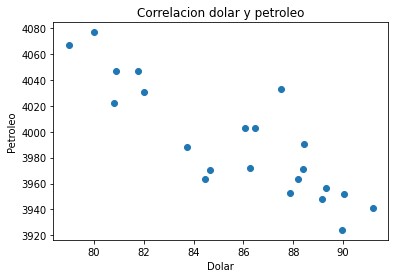

In [ ]:
plt.scatter(brent["Close"],Dolar["Close"]) #Diagrama de dispersion 
plt.title("Correlacion dolar y petroleo")
plt.xlabel("Dolar")
plt.ylabel("Petroleo")

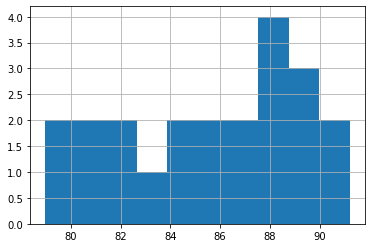

In [ ]:
brent["Close"].hist() # Histograma 

In [ ]:
brent["Close"].describe() # Estadistica descriptiva 

count    22.000000
mean     85.735455
std       3.673414
min      78.980000
25%      82.422500
50%      86.375000
75%      88.425000
max      91.210000
Name: Close, dtype: float64

In [ ]:
brent99= pd.DataFrame(brent["Close"]) # Correlacion 
Dolar99= pd.DataFrame(Dolar["Close"])
Euro99= pd.DataFrame(Euro["Close"])
correlacion = pd.concat([brent99,Dolar99,Euro99 ], axis=1,)
Correlacion1=correlacion.corr(method="spearman")
print(Correlacion1)

          Close     Close     Close
Close  1.000000 -0.832768 -0.866742
Close -0.832768  1.000000  0.925989
Close -0.866742  0.925989  1.000000


In [ ]:
est = smf.ols(formula='brent99 ~ Dolar99', data = correlacion).fit() # regresion lineal 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                brent99   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     53.39
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           4.59e-07
Time:                        11:24:00   Log-Likelihood:                -45.028
No. Observations:                  22   AIC:                             94.06
Df Residuals:                      20   BIC:                             96.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    373.5229     39.387      9.483      0.000     291.364     455.682
Dolar99       -0.0721      0.010     -7.307      0.000      -0.093      -0.052
==============================================================================
Omnibus:                        1.078   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                0.414
Skew:                           0.332   Prob(JB):                        0.813
Kurtosis:                       3.100   Cond. No.                     3.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

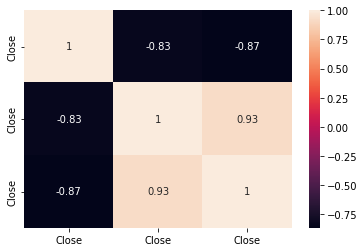

In [ ]:
sns.heatmap(Correlacion1,annot=True) # Diagrama de correlacion 

In [ ]:
Ecopetrol  = yf.Ticker("EC") # yahoo finance (1ADR DE ECOPETROL = 20 COLOMBIANAS) 14.57*3950/20 = 5877.575
Ecopetrol.info 
hist = Ecopetrol.history(period="max")
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-25,14.08,14.70,13.99,14.67,1384500,0.0,0
2022-01-26,14.86,15.00,14.64,14.72,1027700,0.0,0
2022-01-27,14.86,14.96,14.51,14.61,644200,0.0,0
2022-01-28,14.57,14.77,14.40,14.65,929200,0.0,0
2022-01-31,14.60,14.83,14.48,14.74,807300,0.0,0


Date
2008-10-10    0.262
2008-11-28    0.243
2009-04-13    0.297
2009-08-12    0.635
2009-11-30    0.704
2010-04-12    0.329
2010-08-10    0.305
2010-11-30    0.331
2011-04-07    0.524
2011-07-08    0.540
2011-10-07    0.538
2012-04-19    3.410
2013-04-09    3.206
2014-04-22    2.646
2015-06-17    1.034
2017-04-25    0.161
2018-04-17    0.637
2019-04-23    1.444
2019-12-26    0.535
2020-04-21    0.894
2021-04-20    0.093
Name: Dividends, dtype: float64

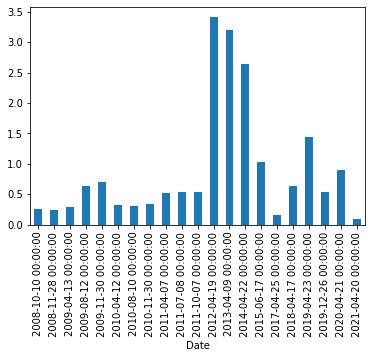

In [ ]:
Dividendos=Ecopetrol.dividends # Acciones 88,49%  Ministerio de hacienda 
Dividendos.plot.bar()
Dividendos # 2021 0.093

# **Datos economicos de la reserva federal**




,Inflacion
DATE,
2021-07-01,0.330943
2021-08-01,0.439802
2021-09-01,0.383142
2021-10-01,0.018175
2021-11-01,0.490641


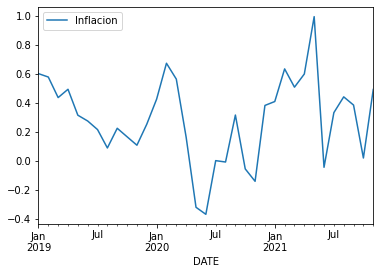

In [ ]:
#  https://fred.stlouisfed.org/ 
tickersfred = ["COLCPALTT01GPM"] # Inflacion total, variacion  Mensual 
Inflacion = wb.DataReader(tickersfred,"fred","2019-1-1")
Inflacion.columns = ["Inflacion"]
Inflacion = pd.DataFrame(Inflacion)
Inflacion.plot()
Inflacion.tail()

In [ ]:
Inflacion.columns 

Index(['Inflacion'], dtype='object')

In [ ]:
Inflacion= Inflacion.rename_axis('Fecha').reset_index()

In [ ]:
Inflacion.columns 

Index(['Fecha', 'Inflacion'], dtype='object')

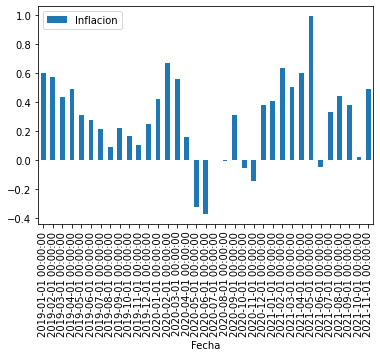

In [ ]:
pd.to_datetime(Inflacion['Fecha'], format = '%Y/%m/%d') # Convertir columna a serie de tiempo %Y/%m/%d
Inflacion.plot.bar(x= "Fecha" , y ="Inflacion")

,InflacionAnual
DATE,
2016-01-01,7.514293
2017-01-01,4.312141
2018-01-01,3.240234
2019-01-01,3.525493
2020-01-01,2.524621


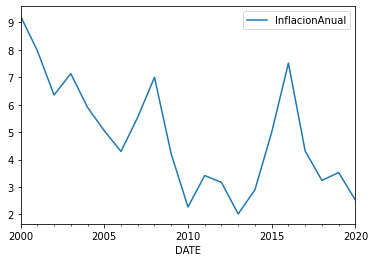

In [ ]:
#  https://fred.stlouisfed.org/  
tickersfred = ["FPCPITOTLZGCOL"] # Inflacion total, variacion  Anual
InflacionAnual = wb.DataReader(tickersfred,"fred","2000-1-1")
InflacionAnual.columns = ["InflacionAnual"]
InflacionAnual= pd.DataFrame(InflacionAnual)
InflacionAnual.plot()
InflacionAnual.tail()

,M1
DATE,
2021-07-01,1.693642e+14
2021-08-01,1.722251e+14
2021-09-01,1.726599e+14
2021-10-01,1.757376e+14
2021-11-01,1.795055e+14


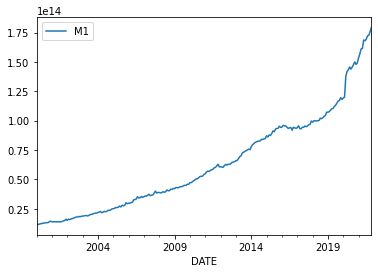

In [ ]:
#  https://fred.stlouisfed.org/ 
tickersfred = ["COLMANMM101STSAM"] # Agregados monetatrios, M1
M1 = wb.DataReader(tickersfred,"fred","2000-1-1")
M1.columns = ["M1"]
M1= pd.DataFrame(M1)
M1.plot()
M1.tail()

,PIBMEXICO
DATE,
2020-07-01,4260905.9
2020-10-01,4384622.6
2021-01-01,4428930.2
2021-04-01,4479912.0
2021-07-01,4460495.3


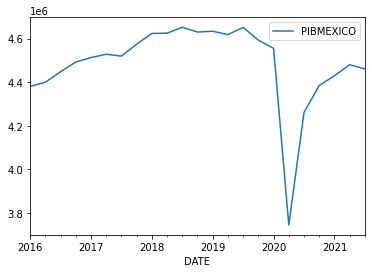

In [ ]:
#  https://fred.stlouisfed.org/ 
tickersfred = ["NGDPRSAXDCMXQ"] # PIB REAL MEXICO , TRIMESTRAL
PIBREAL_MEXICO = wb.DataReader(tickersfred,"fred","2016-1-1")
PIBREAL_MEXICO .columns = ["PIBMEXICO"]
PIBREAL_MEXICO = pd.DataFrame(PIBREAL_MEXICO )
PIBREAL_MEXICO .plot()
PIBREAL_MEXICO .tail()